In [91]:
import pandas as pd
import geopandas as gp
import fiona
import descartes
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import contextily as ctx
import matplotlib.pylab as pylab
from scipy import ndimage
import numpy as np
import seaborn as sns
import scipy
import six
from pandas import read_excel

In [95]:
MAP = gp.read_file('CA_Counties')

In [282]:


file_name = 'laucntycur14.xlsx' 
df = read_excel(file_name,skiprows=(4),sheet_name=0)
df.head() 
df = df.dropna()

In [283]:
df['County Name/State Abbreviation'] = df['County Name/State Abbreviation'].str.replace('County', '')

In [284]:
df = df[df['County Name/State Abbreviation'].str.contains('CA')]
date = 'May-20'
df = df[df['Period'].str.contains(date)]
df.dropna()

,LAUS Code,Code,Code.1,County Name/State Abbreviation,Period,Force,Employed,Unemployed,(%)


In [285]:
df['NAME'] = df['County Name/State Abbreviation'].str.split(',').str[0]

In [286]:
del df['LAUS Code']
del df['Code']
del df['Code.1']
del df['County Name/State Abbreviation']
del df['Period']
del df['Force']

In [287]:
df = gp.GeoDataFrame(df)


In [288]:
df = df.reset_index()

In [289]:
df.NAME = df.NAME.astype(str)

In [290]:
MAP.NAME = MAP.NAME.astype(str)

In [291]:
df['NAME'] = df['NAME'].str.strip()

In [292]:
map2 = MAP.merge(df,on='NAME',how='inner')


In [293]:
map2.head()

map3 = gp.GeoDataFrame(map2)

In [294]:
df.head()


,index,Employed,Unemployed,(%),NAME


/Users/johnthe/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


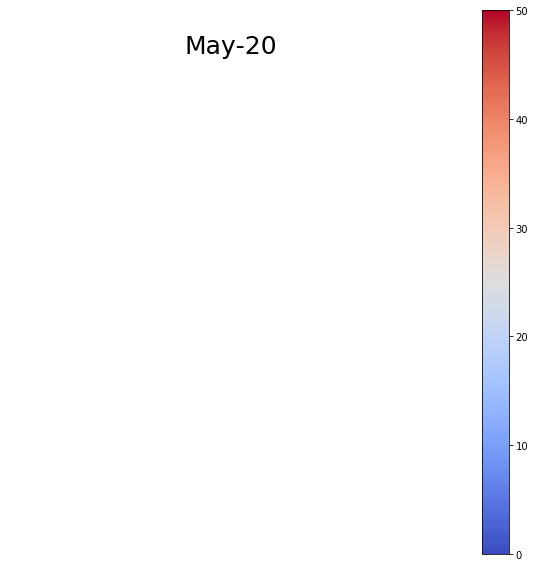

In [295]:
vmin, vmax = 0, 50
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title(date, fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
fig.colorbar(sm)

map3.plot(column='(%)',cmap='coolwarm',ax=ax)
plt.savefig(date+'.png')

IndexError: index 0 is out of bounds for axis 0 with size 0

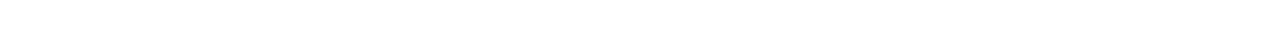

In [296]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=16,
                     header_color='#07080f', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns=0, col_width=4.5)
plt.savefig(date + 'chart.png')